In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import scoobpsf
from scoobpsf.math_module import xp, _scipy
from scoobpsf.imshows import *
from scoobpsf import scoobm

pupil_diam = 6.75*u.mm
wavelength_c = 632.8e-9*u.m

dm_flat = fits.getdata(scoobm.module_path/'scoob_dm_flat.fits')

vortex = scoobpsf.agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6, singularity=20*u.um)
lyot_stop = poppy.CircularAperture(name='Lyot Stop', radius=3.6*u.mm/2)

Could not import scoobpy. Testbed interface unavailable.


# Note that you can use the setattr and getattr methods to interact with attributes. This is not particularly useful when using a single instance of the SCOOB model but is very useful when doin parallel computing with Ray.

In [3]:
reload(scoobm)
model = scoobm.SCOOBM()
model.det_rotation = -5
print(model.getattr('det_rotation'))
model.setattr('det_rotation', 20)
print(model.getattr('det_rotation'))

-5
20


# Initialize the system and set the parameters for the model

In [17]:
512*32

16384

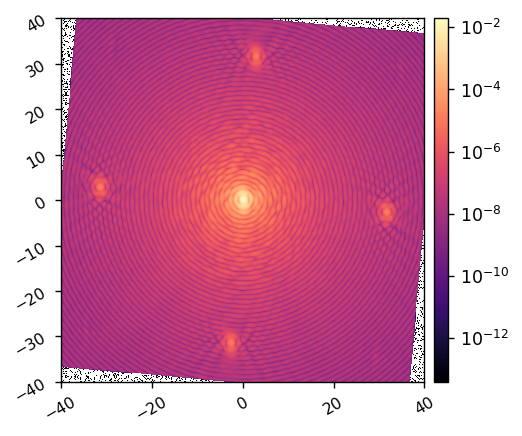

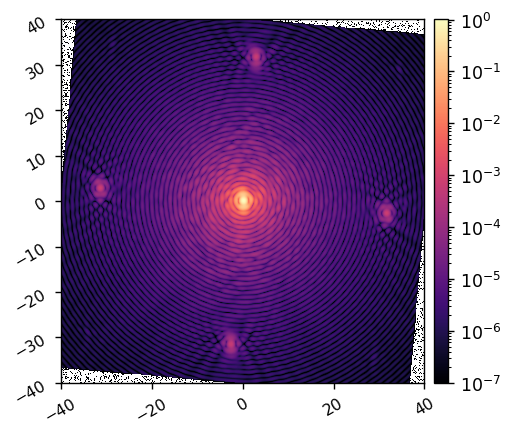

In [20]:
reload(scoobm)
model = scoobm.SCOOBM()
model.npix = 512
model.oversample = 16
model.det_rotation = -5

# model.use_opds = True
model.set_dm(dm_flat)

ref_im = model.snap()
imshow1(ref_im, lognorm=True, pxscl=model.psf_pixelscale_lamD)

model.imnorm = ref_im.max()

normalized_im = model.snap()
imshow1(normalized_im, lognorm=True, vmin=1e-7, pxscl=model.psf_pixelscale_lamD)

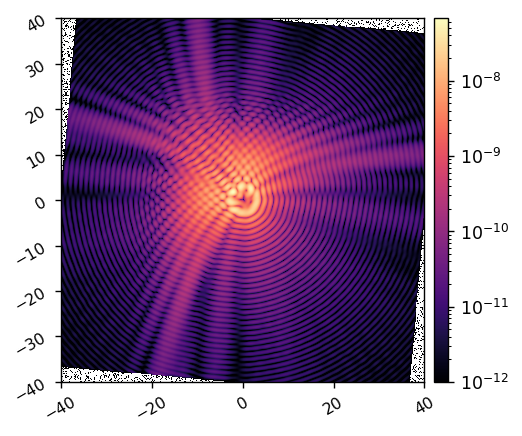

In [23]:
model.reset_dm()
# model.zero_dm()

model.FPM = vortex
model.LYOT = lyot_stop

im = model.snap()
imshow1(im, lognorm=True, vmin=1e-12, pxscl=model.psf_pixelscale_lamD)


Propagating wavelength 632.800 nm.
462.66806649168853 mm
PSF calculated in 0.655s


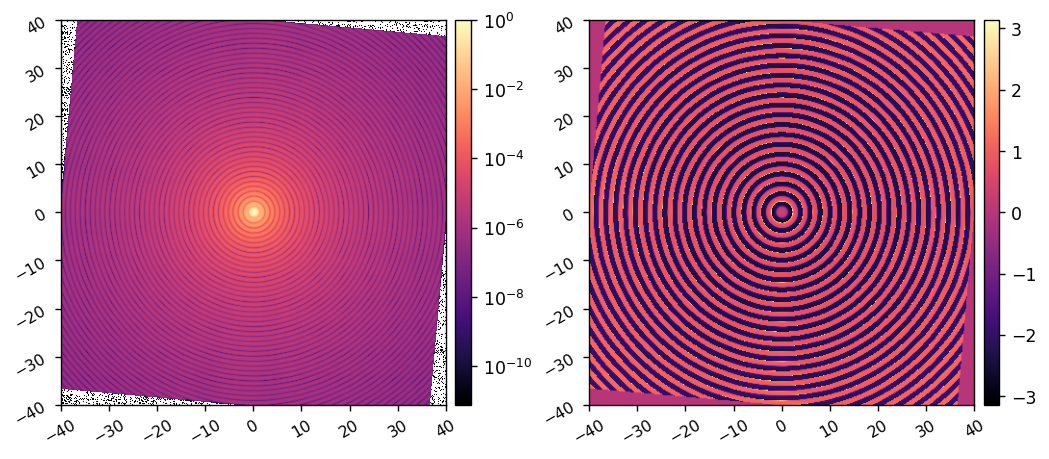

In [12]:
model.FPM = None
model.LYOT = None

wfs = model.calc_wfs()

imshow2(wfs[-1].intensity, wfs[-1].phase, 
             lognorm1=True, 
             pxscl=model.psf_pixelscale_lamD)

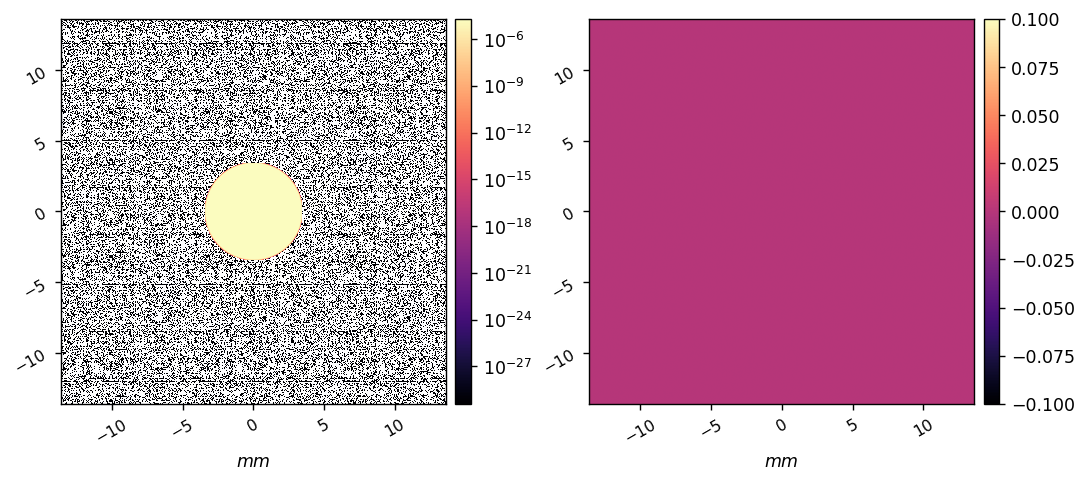

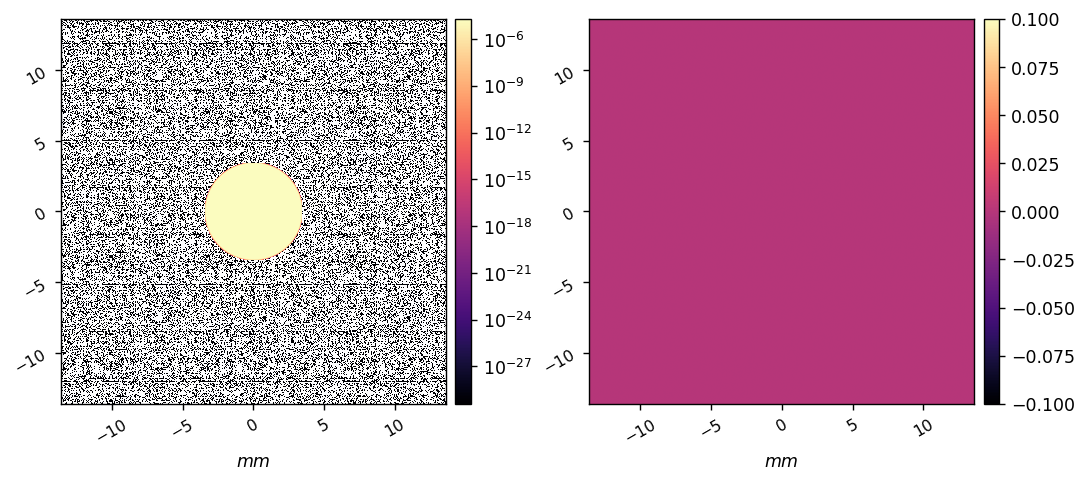

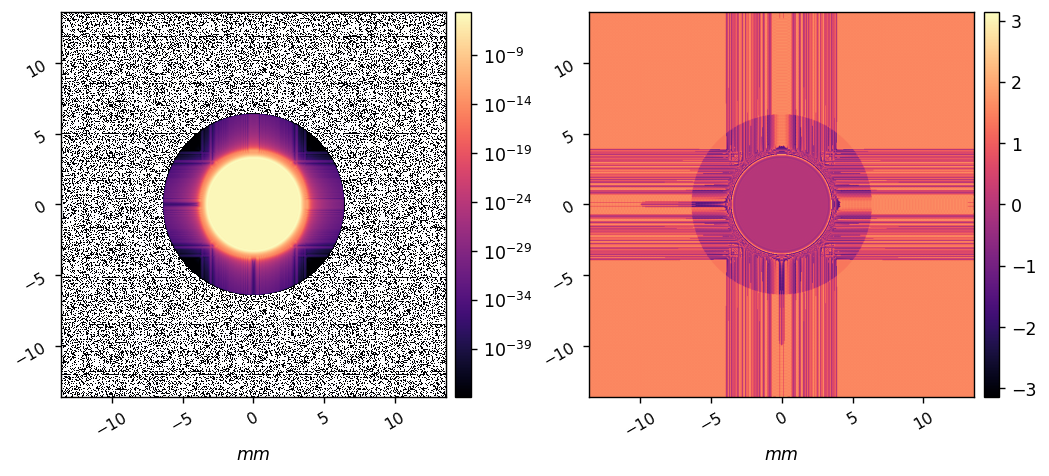

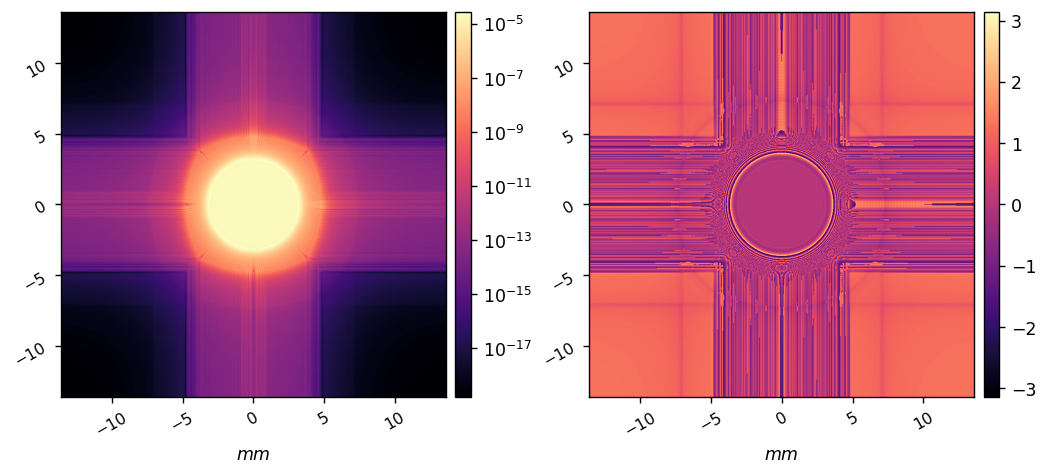

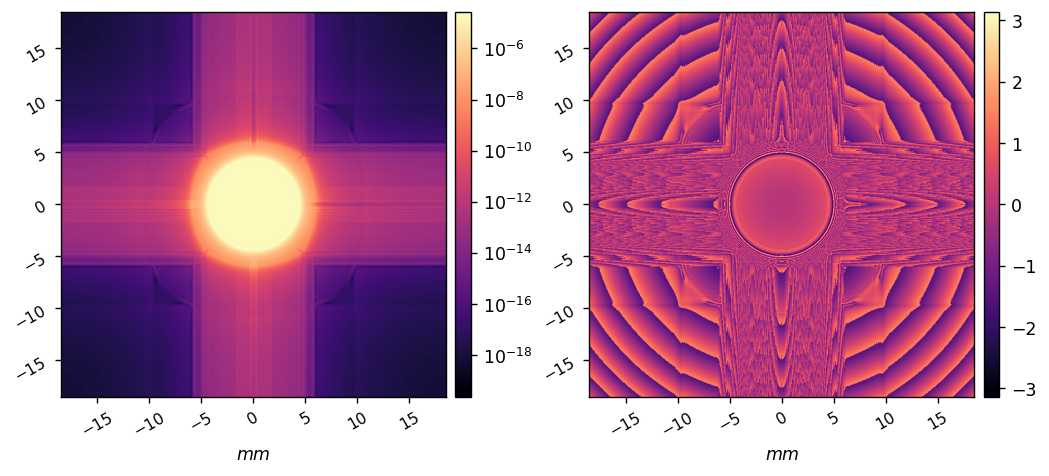

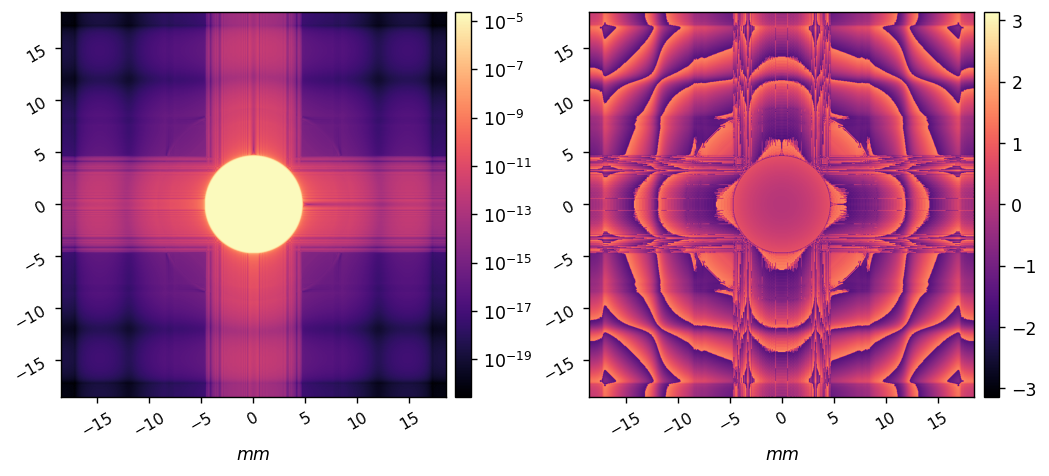

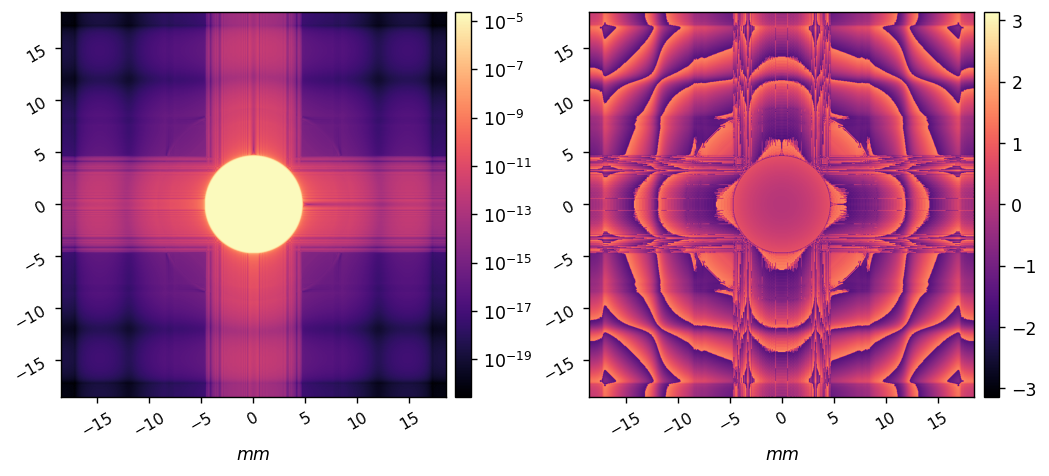

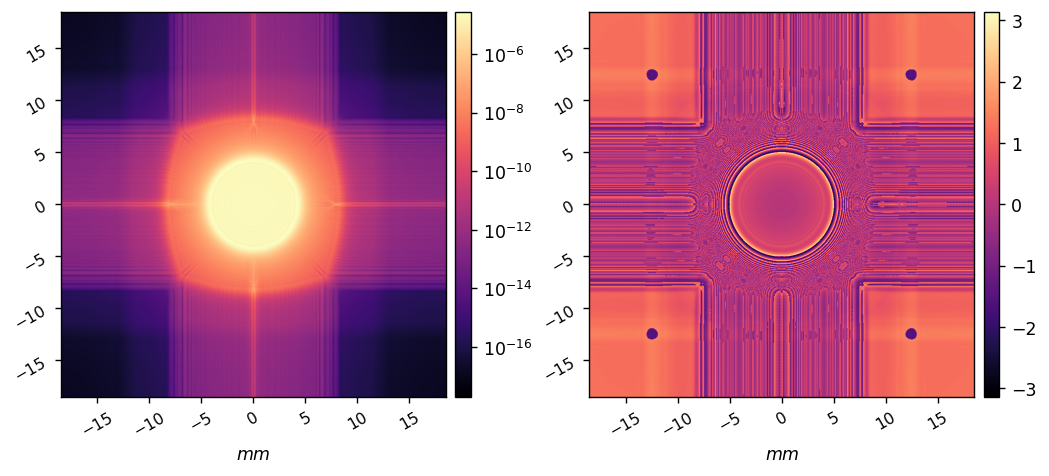

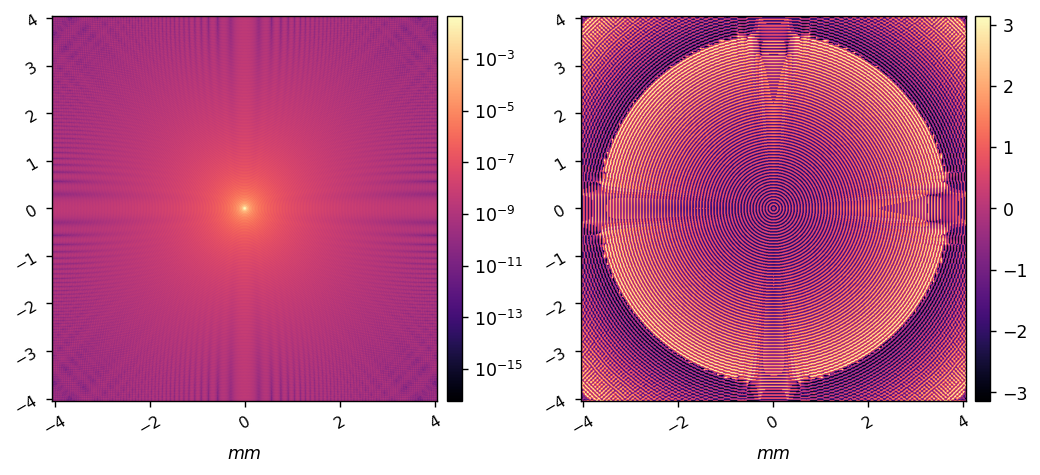

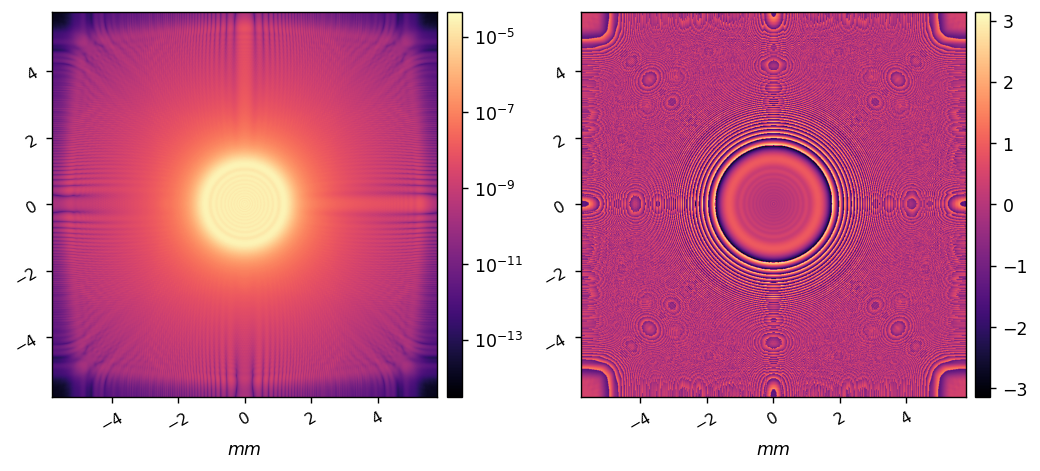

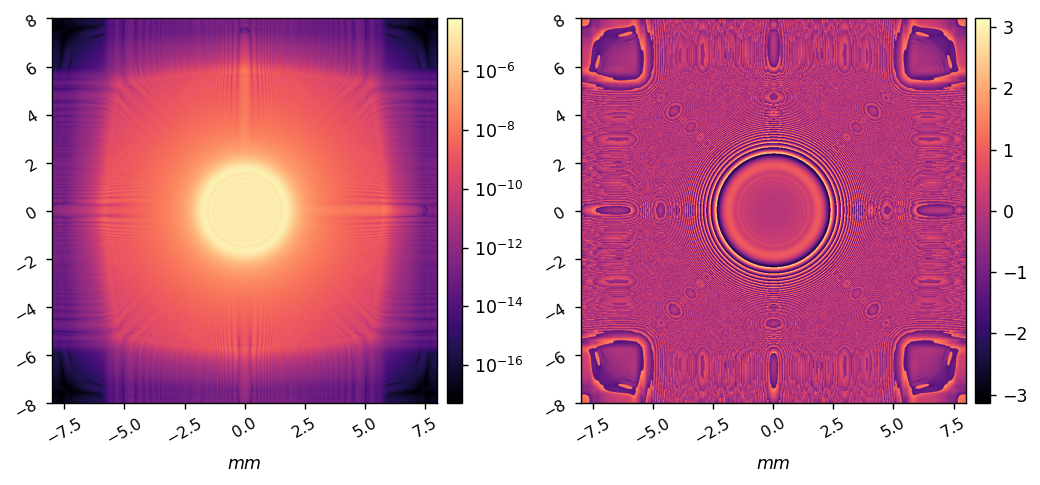

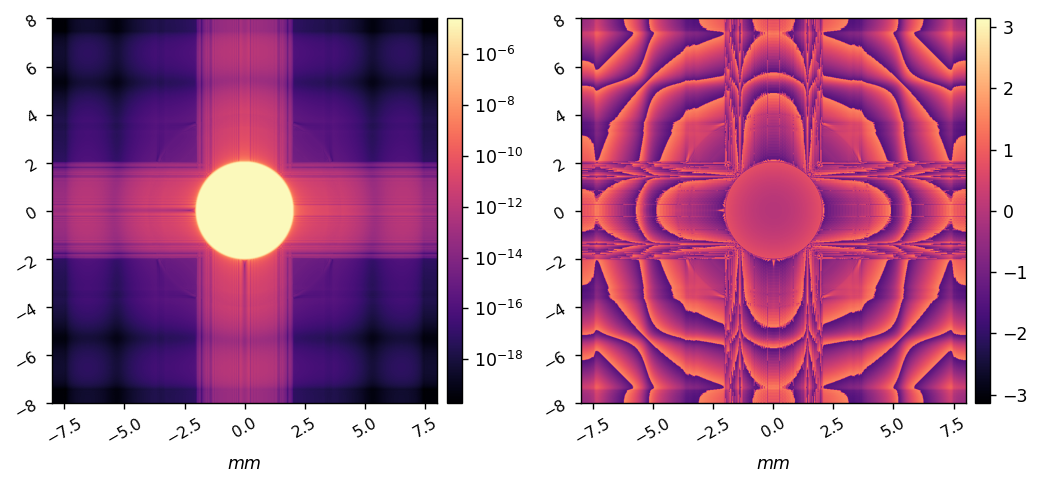

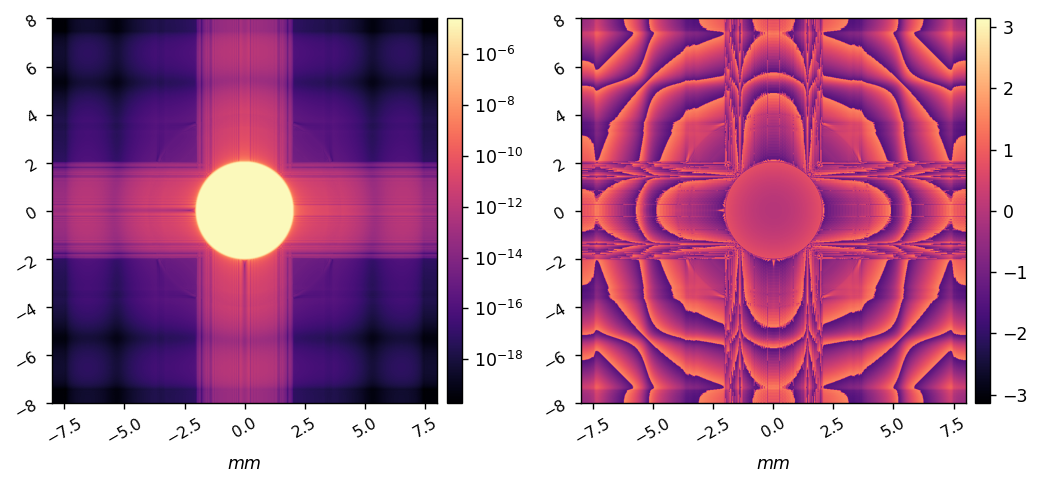

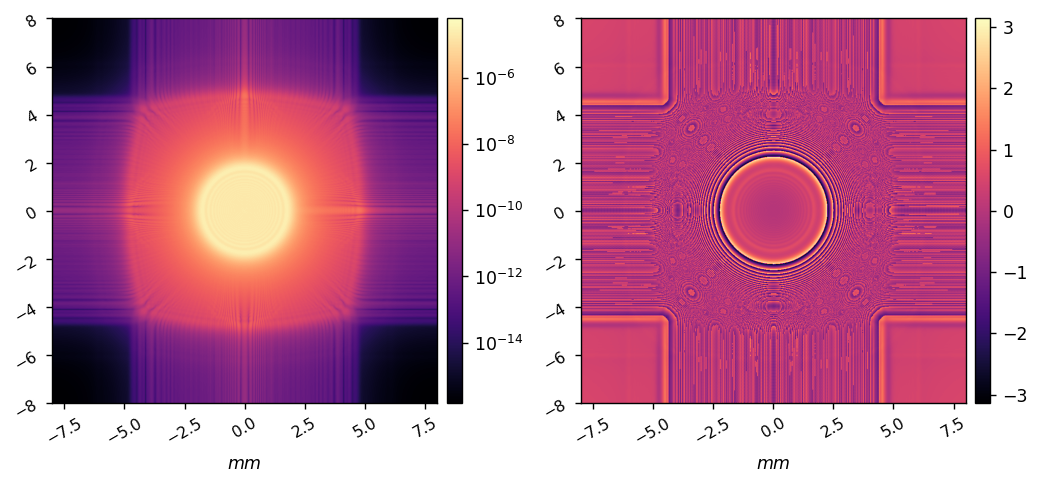

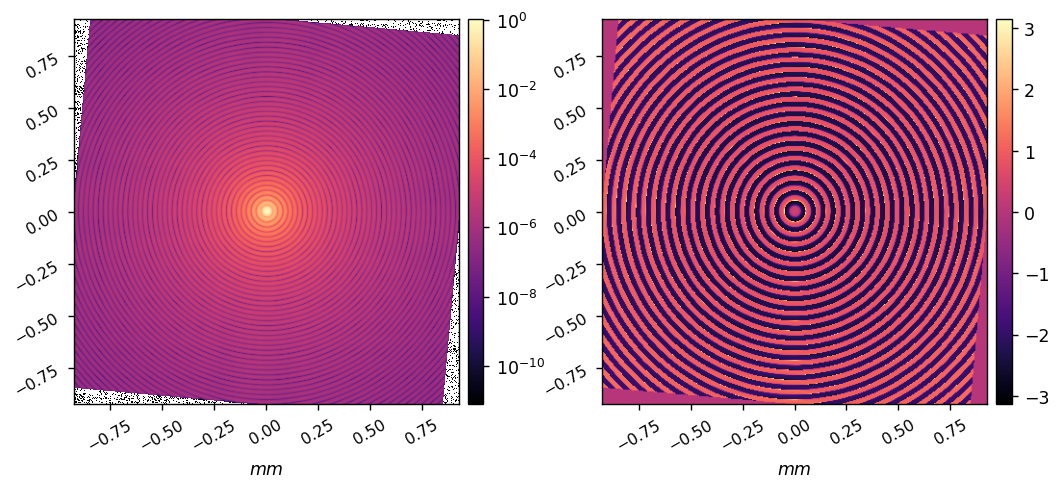

In [16]:
for i,wf in enumerate(wfs):
    imshow2(wf.intensity, wf.phase, lognorm1=True,
            pxscl=wf.pixelscale.to_value(u.mm/u.pix), xlabel='$mm$')